**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

**Grupo 8**

**Integrantes:**


*   Abdala, Agustin
*   Acosta, Martín
*   Baulina, David
*   Giovine, Carina
----

# DiploDatos Kaggle Competition


Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
#imputer = KNNImputer(n_neighbors=2)
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [ ]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [ ]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test Árbol de decisión: 72.84%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Árbol de decisión: 81.88%
Accuracy test Árbol de decisión: 76.29%


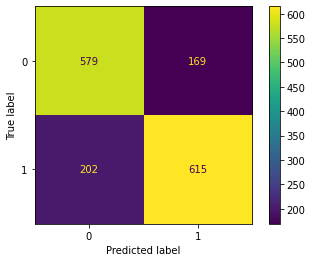

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       748
           1       0.78      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [ ]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.59
Precisión test fold 1: 77.88
Precisión test fold 2: 78.04
Precisión test fold 3: 77.62
Precisión test fold 4: 76.66
Avg. accuracy = 77.75627421385576


## Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv')

In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [ ]:
test_id = PassengerId
test_pred = clf.predict(test_df)


In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

# Respuestas

## 1- ¿De qué se trata el conjunto de datos?

El conjunto de datos es un conjunto de una competencia de Kaggle, para predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para hacer las predicciones, se proporciona un conjunto de registros personales recuperados del sistema informático dañado de la nave espacial.

## 2- ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?




La variable objetivo es la variable binaria 'Transported'. En la misma se muestra si el pasajero fue transportado a una dimension alternativa, tiene la siguiente salida:


*   1 si el pasajero fue transportado a otra dimensión
*   0 si el pasajero no fue transportado a otra dimensión

Esta es la variable que se utilizará para realizar la predicción de transportación y poder decidir si se debe realizar busqueda del pasajero o no.



## 3- ¿Qué información (atributos) hay disponible para hacer la predicción?


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')

In [ ]:
dataset.shape

(7823, 14)

In [ ]:
dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
dataset.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [ ]:
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


Los atributos disponibles para realizar la predicción son:

*   **PassengerId** - Es el número de identificación del pasajero Un Id único para cada pasajero.
*   **HomePlanet** - El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.
*   **CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
*   **Cabin** - El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde sidepuede ser Ppor Babor o Spor Estribor .
*   **Destination** - El planeta al que desembarcará el pasajero.
*   **Age** - La edad del pasajero.
*   **VIP** - Si el pasajero ha pagado por servicio VIP especial durante el viaje.
*  **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic 
*   **Name** - El nombre y apellido del pasajero.
*  **Transported**- Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que se tratara de predecir.


## Visualización

###Cantidad de pasajeros transportados a otra dimensión

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

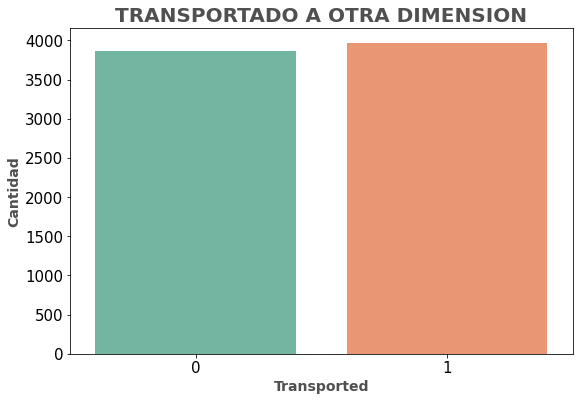

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='Transported', palette="Set2")

plt.title('TRANSPORTADO A OTRA DIMENSION', 
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=14, fontweight='bold', color='#505050')
plt.xlabel("Transported", size=14, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En este grafico se puede ver que, más de la mitad de los pasajeros fueron transportados a otra dimensión

###Cantidad de pasajeros transportados a otra dimensión vs CryoSleep

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

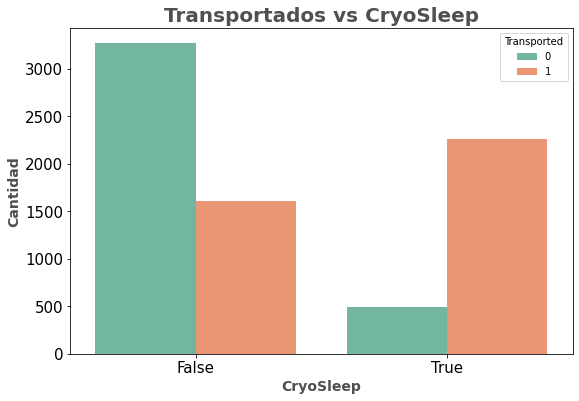

In [ ]:
#Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.color_palette("flare", as_cmap=True)

sns.countplot(data=dataset, x='CryoSleep', hue='Transported',palette="Set2")

plt.title('Transportados vs CryoSleep',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=14, fontweight='bold', color='#505050')
plt.xlabel("CryoSleep", size=14, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En el grafico anterior podemos ver que los pasajeros en criosueño (que estában confinados en sus cabinas) tienen una mayor posibilidad de haber sido transportados a otra dimensión.

###Cantidad de pasajeros transportados a otra dimensión vs Lugar de origen 

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

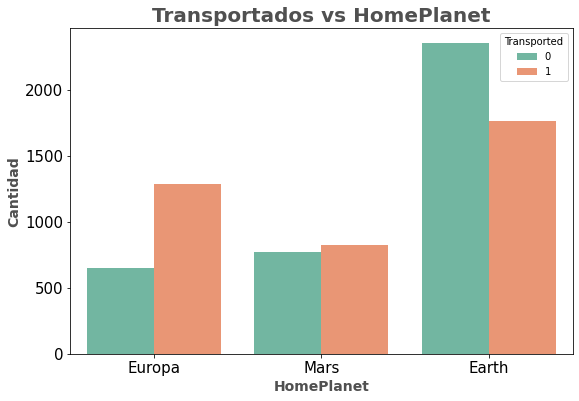

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='HomePlanet',hue='Transported', palette="Set2")

plt.title('Transportados vs HomePlanet',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=14, fontweight='bold', color='#505050')
plt.xlabel("HomePlanet", size=14, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En este grafico se puede ver que según el lugar de origen de los pasajeros las posibilidades de se transportados cambian.

###Cantidad de pasajeros VIP transportados 

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

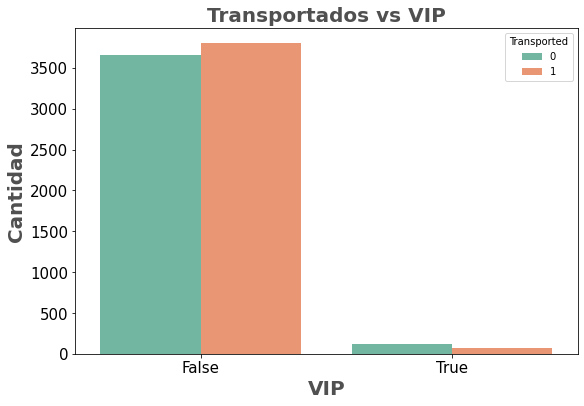

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='VIP',hue='Transported', palette="Set2")

plt.title('Transportados vs VIP',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("VIP", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

###Cantidad de pasajeros transportados a otra dimensión vs destino

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

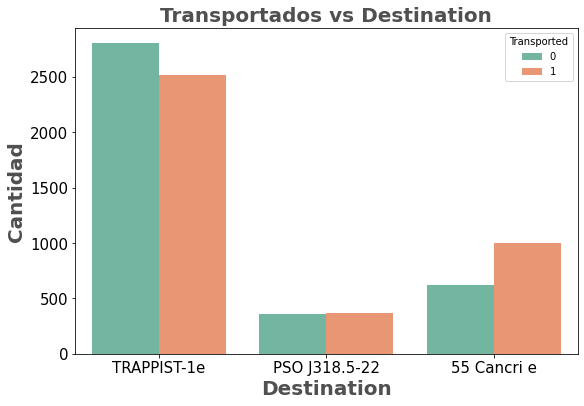

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='Destination',hue='Transported', palette="Set2")

plt.title('Transportados vs Destination',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Destination", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En este grafico se puede ver que según el destino cambia la cantidad de pasajeros transportados

###Cantidad de pasajeros transportados a otra dimensión vs zona de la nave donde se alojaba

In [ ]:
dataset['Cabin'] = dataset['Cabin'].astype(str)
dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x[-1:])
dataset['Cabin'] = dataset['Cabin'].apply(lambda x: x[:1])
dataset['Cabin'].unique(), dataset['Cabin_side'].unique()

(array(['C', 'F', 'B', 'G', 'E', 'D', 'n', 'A', 'T'], dtype=object),
 array(['P', 'S', 'n'], dtype=object))

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

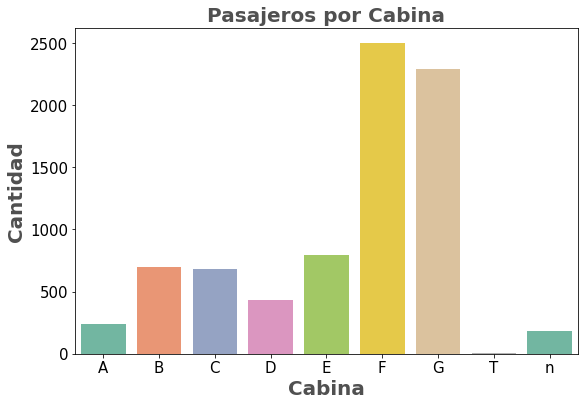

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset.sort_values(by=['Cabin']), x='Cabin',palette="Set2")

plt.title('Pasajeros por Cabina',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Cabina", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En el grafico anterior se puede ver que la cantidad de pasajeros cambia segun el Deck en el que viajaban, se verifica una gran concentración de pasajeros en Decks F y G

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

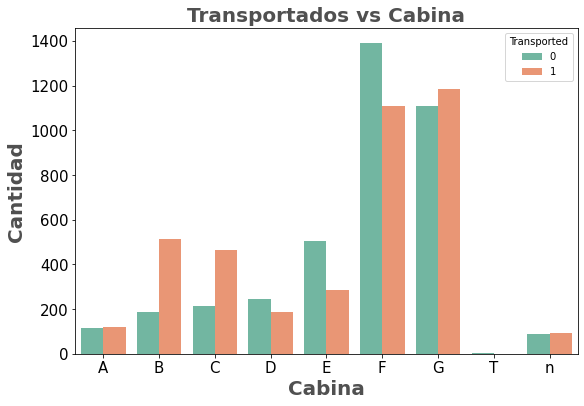

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset.sort_values(by=['Cabin']), x='Cabin',hue='Transported', palette="Set2")

plt.title('Transportados vs Cabina',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Cabina", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

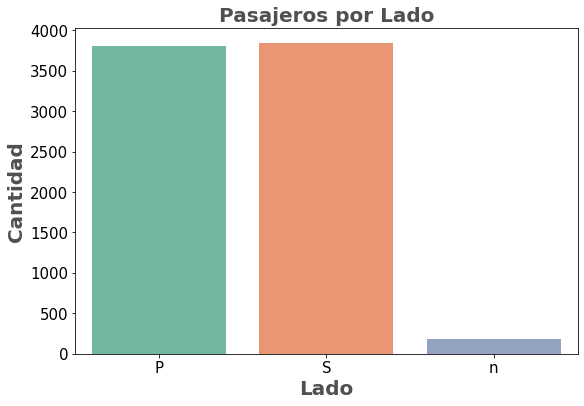

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset.sort_values(by=['Cabin']), x='Cabin_side', palette="Set2")

plt.title('Pasajeros por Lado',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Lado", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

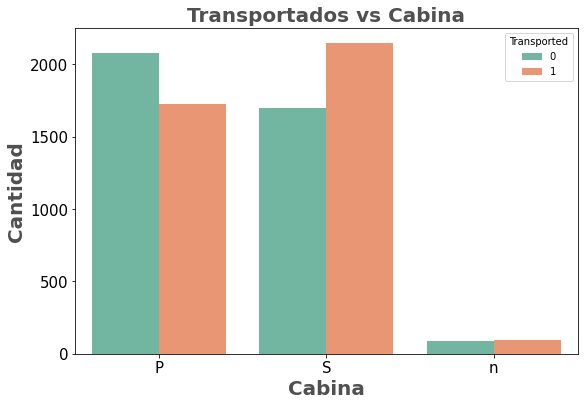

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset.sort_values(by=['Cabin']), x='Cabin_side',hue='Transported', palette="Set2")

plt.title('Transportados vs Cabina',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Cabina", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En este grafico se puede ver que la cantidad de pasajeros que viajaban del lado S que fuerontransportados fueron mas que los del lado P.

###Porcentaje de pasajeros transportados segun zon donde se alojaban

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
spaceship_location = df['Transported']

y = df.Transported
X = df.drop('Transported',axis=1)


In [ ]:
X['Cabin'] = X['Cabin'].astype(str)
X['Cabin_side'] = X['Cabin'].apply(lambda x: x[-1:])
X['Cabin'] = X['Cabin'].apply(lambda x: x[:1])
X['Cabin'].unique(), X['Cabin_side'].unique()
X = X.drop(['FoodCourt', 'ShoppingMall'], axis=1)

In [ ]:
spaceship_location = df['Transported']
temp_df = X[['Cabin','Cabin_side']].copy()
spaceship_location = pd.concat([temp_df, spaceship_location], axis=1)


In [ ]:
spaceship_location_grouped = spaceship_location.groupby(['Cabin', 'Cabin_side', 'Transported'])['Transported'].count()
spaceship_location_grouped = pd.DataFrame(spaceship_location_grouped)


In [ ]:
spaceship_location_grouped_total = spaceship_location.groupby(['Cabin', 'Cabin_side'])['Transported'].count()
spaceship_location_grouped_total = pd.DataFrame(spaceship_location_grouped_total)
spaceship_location_grouped_total=spaceship_location_grouped_total.groupby(['Cabin', 'Cabin_side'])['Transported'].apply(lambda x: (x).sum()).reset_index(name='count_transported')



In [ ]:
#spaceship_location_grouped_sum = spaceship_location.groupby(['Cabin', 'Cabin_side'])['Transported'].sum()
#spaceship_location_grouped_sum = pd.DataFrame(spaceship_location_grouped_sum)
#spaceship_location_grouped_sum = spaceship_location_grouped.drop(['n', 'T'])


In [ ]:
df_ones=spaceship_location.groupby(['Cabin', 'Cabin_side'])['Transported'].apply(lambda x: (x==1).sum()).reset_index(name='count_transported')


In [ ]:
merged = pd.merge(spaceship_location_grouped_total, df_ones,  how='left', left_on=['Cabin','Cabin_side'], right_on = ['Cabin','Cabin_side'])
merged['porcentaje_transportados'] = merged['count_transported_y'] / merged['count_transported_x'] * 100
merged['porcentaje_transportados'] = merged['porcentaje_transportados'].round(2)
merged = merged.drop(15)

In [ ]:
heatmap_merged = merged.copy().drop(['count_transported_x', 'count_transported_y'], axis=1)


In [ ]:
import seaborn as sns; sns.set_theme()


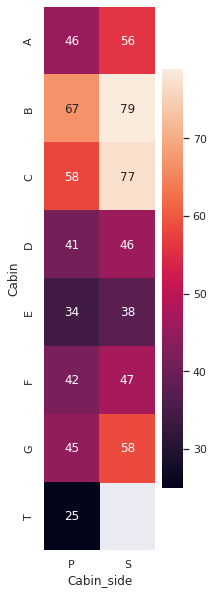

In [ ]:
plt.figure(figsize=(2.5, 10))
df_heatmap = heatmap_merged.pivot_table(values='porcentaje_transportados',index='Cabin',columns='Cabin_side',aggfunc=np.sum)
sns.heatmap(df_heatmap,annot=True, fmt='.0f')
plt.show()

El grafico anterior muestra el porcentaje de pasajeros transportados en % por zona en la que se alojaban.

###Cantidad de pasajeros transportados a otra dimensión vs edad y gastos realizados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

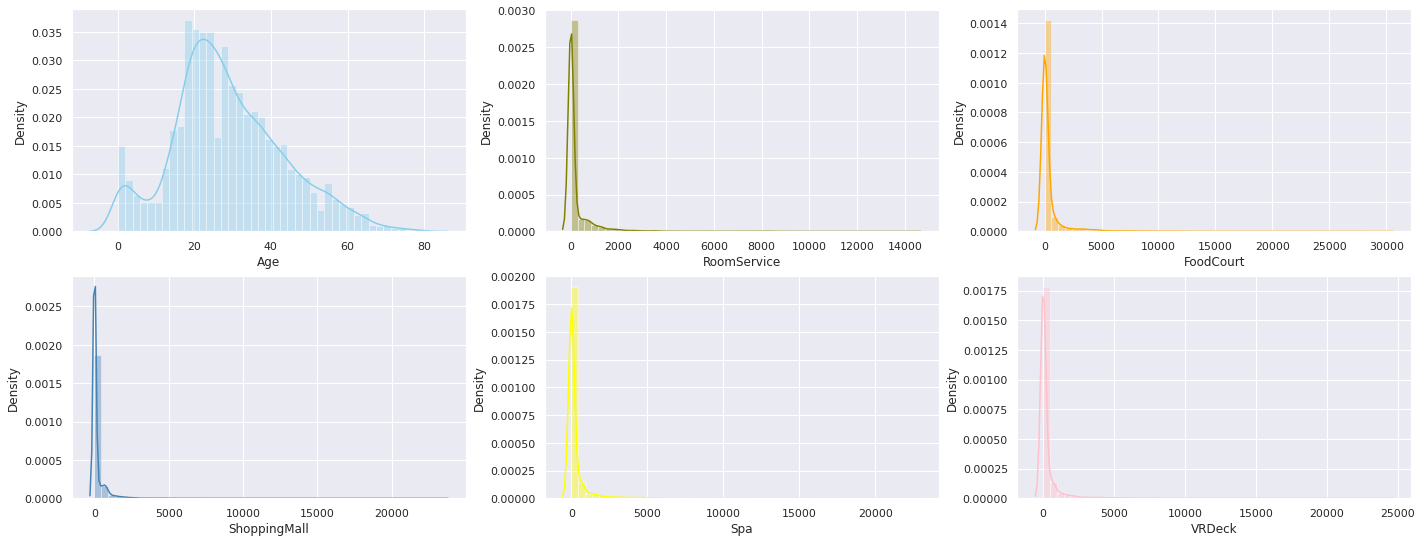

In [ ]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(2, 3, figsize=(24,9))
sns.distplot( dataset['Age'] , color="skyblue", ax=axes[0, 0])
sns.distplot( dataset['RoomService'] , color="olive", ax=axes[0, 1])
sns.distplot( dataset['FoodCourt'] , color="orange", ax=axes[0, 2])
sns.distplot( dataset['ShoppingMall'] , color="steelblue", ax=axes[1, 0])
sns.distplot( dataset['Spa'] , color="yellow", ax=axes[1, 1])
sns.distplot( dataset['VRDeck'] , color="pink", ax=axes[1, 2])


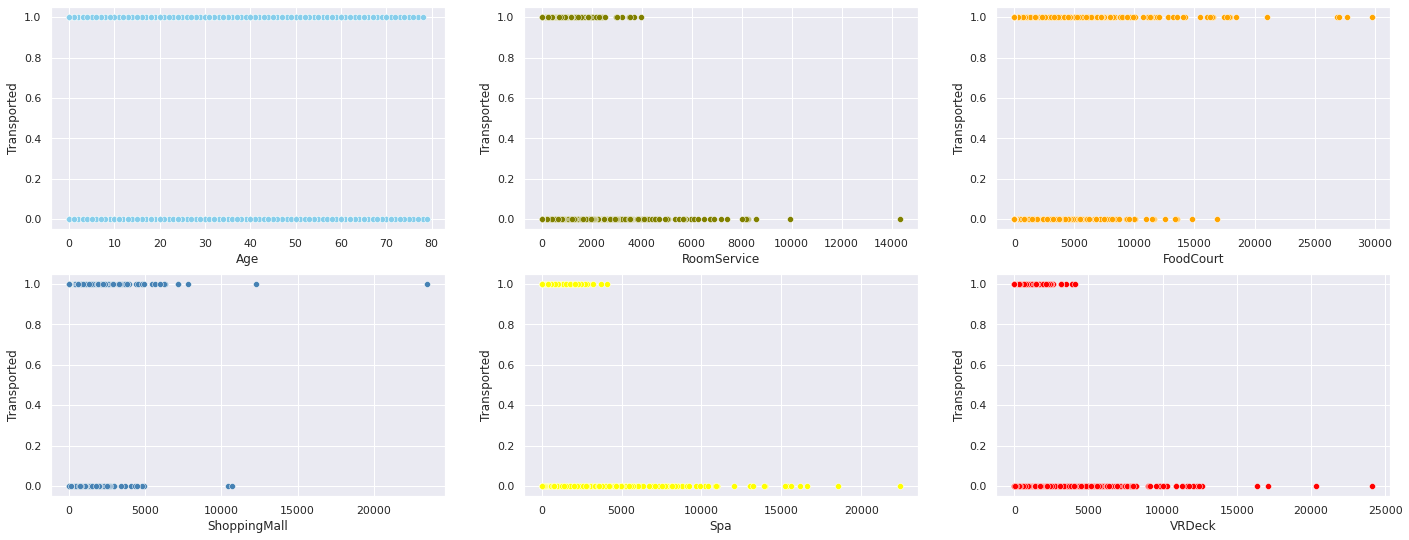

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(24,9))
sns.scatterplot(x = 'Age', y = 'Transported', data = dataset , color="skyblue", ax=axes[0, 0])
sns.scatterplot(x = 'RoomService', y = 'Transported', data = dataset , color="olive", ax=axes[0, 1])
sns.scatterplot(x = 'FoodCourt', y = 'Transported', data = dataset , color="orange", ax=axes[0, 2])
sns.scatterplot(x = 'ShoppingMall', y = 'Transported', data = dataset , color="steelblue", ax=axes[1, 0])
sns.scatterplot(x = 'Spa', y = 'Transported', data = dataset , color="yellow", ax=axes[1, 1])
sns.scatterplot(x = 'VRDeck', y = 'Transported', data = dataset , color="red", ax=axes[1, 2])


En el grafico anterior se puede ver que los que mas gastos realizaron en RoomService, Spa y VRDeck no fueron transportados a otra dimensión

## 4- ¿Qué atributos imagina ud. que son los más determinantes para la predicción?


Se realiza Matriz de Correlación para ver la relación entre atributos.


Text(0.5, 1.0, 'Correlation between Variables')

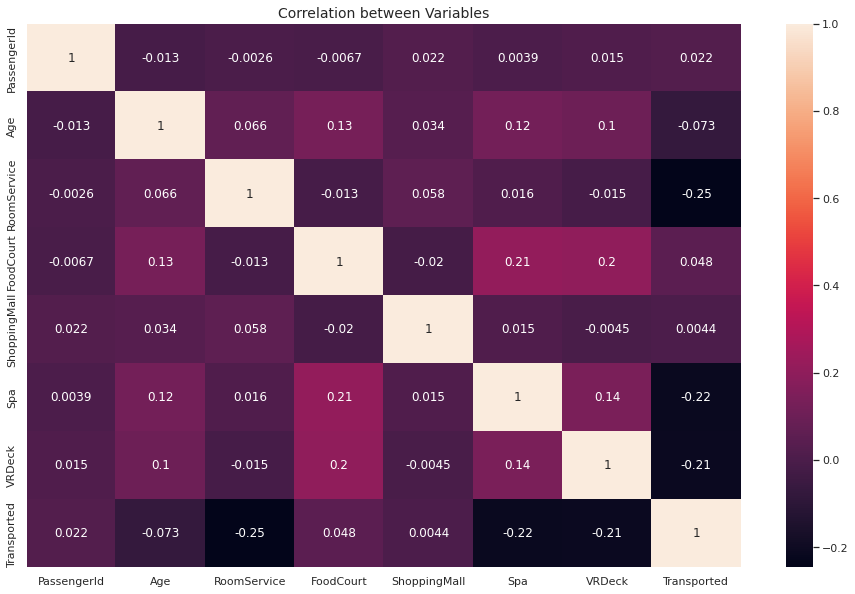

In [ ]:
import seaborn as sns
# create heatmap for the calculated correlation
plt.figure(figsize=(16,10))
sns.heatmap(dataset[dataset.columns].corr(),annot=True, fmt='.2g')
plt.title('Correlation between Variables', fontsize=14)

Los atributos disponibles que se estima que pueden ser mas determinantes para la predicción, son:

*   **RoomService**
*   **FoodCourt**
*   **VRDeck**



#Aplicando Random Forest

In [ ]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

In [ ]:
clfs = [RandomForestClassifier()]
names = ['Random Forest']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Random Forest
Accuracy train Random Forest: 93.90%
Accuracy test Random Forest: 79.04%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(RandomForestClassifier(),
 {'criterion':('gini','entropy'),
 'n_estimators':(100, 200),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

Accuracy train Random Forest: 85.04%
Accuracy test Random Forest 79.23%


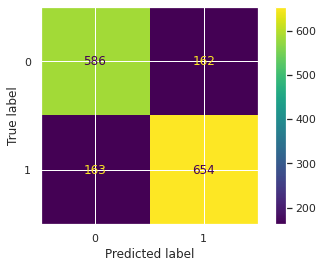

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       748
           1       0.80      0.80      0.80       817

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [ ]:
clf = RandomForestClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name} %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([RandomForestClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)
Precisión test fold 0: 78.12
Precisión test fold 1: 81.87
Precisión test fold 2: 79.71
Precisión test fold 3: 79.14
Precisión test fold 4: 79.38
Avg. accuracy = 79.64193501428889


#Aplicando SVM

In [ ]:
>>> from sklearn.svm import SVC
>>> from sklearn.datasets import make_classification

In [ ]:
clfs = [SVC()]
names = ['SVM']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

SVM
Accuracy train SVM: 79.90%
Accuracy test SVM: 78.08%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
#grid = GridSearchCV(SVC(),
# {'kernel':('linear','poly','rbf', 'sigmoid'),
# 'degree':(3, 4, 5),
# 'gamma':('scale', 'auto'),
#  'C':(1 ,2)})
#grid.fit(x_train,y_train)
#grid.best_params_

In [ ]:
grid = GridSearchCV(SVC(),
 {'kernel':('linear','poly','rbf', 'sigmoid'),
 'degree':(3, 4, 5),
 'gamma':('scale', 'auto')})
grid.fit(x_train,y_train)
grid.best_params_

{'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

Accuracy train SVM: 79.90%
Accuracy test SVM 78.08%


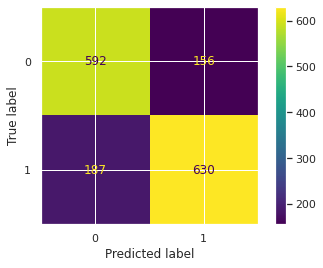

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       748
           1       0.80      0.77      0.79       817

    accuracy                           0.78      1565
   macro avg       0.78      0.78      0.78      1565
weighted avg       0.78      0.78      0.78      1565



In [ ]:
clf = SVC(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name} %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([SVC(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

SVC(gamma='auto')
Precisión test fold 0: 75.80
Precisión test fold 1: 78.99
Precisión test fold 2: 79.31
Precisión test fold 3: 79.06
Precisión test fold 4: 79.30
Avg. accuracy = 78.49174973120545


#Aplicando Regresión Logistica

In [ ]:
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.datasets import make_classification

In [ ]:
clfs = [LogisticRegression()]
names = ['Regresión Logistica']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Regresión Logistica
Accuracy train Regresión Logistica: 78.27%
Accuracy test Regresión Logistica: 78.72%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(LogisticRegression(),
 {'penalty':('l1', 'l2', 'elasticnet', 'none'),
 'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')})
grid.fit(x_train,y_train)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

{'penalty': 'none', 'solver': 'saga'}

Accuracy ['Regresión Logistica']: 78.27%
Accuracy test ['Regresión Logistica'] 78.79%


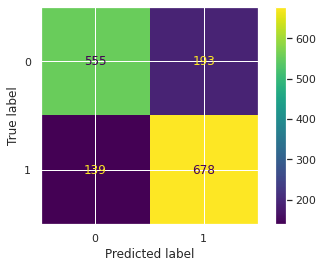

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       748
           1       0.78      0.83      0.80       817

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [ ]:
clf = LogisticRegression(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy {names}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {names} %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([LogisticRegression(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

LogisticRegression(penalty='none', solver='saga')
Precisión test fold 0: 76.84


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Precisión test fold 1: 78.83
Precisión test fold 2: 79.07


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Precisión test fold 3: 77.78
Precisión test fold 4: 78.18
Avg. accuracy = 78.13992895140755


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


#Aplicando K-Nearest Neighbors (KNN)

In [ ]:
>>> from sklearn.neighbors import KNeighborsClassifier
>>> from sklearn.datasets import make_classification

In [ ]:
clfs = [KNeighborsClassifier()]
names = ['KNN Classifier']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

KNN Classifier
Accuracy train KNN Classifier: 81.91%
Accuracy test KNN Classifier: 75.59%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(),
 {'n_neighbors':(3,5,7, 9),
 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
 'weights':('uniform', 'distance')})
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

Accuracy KNN Classifier : 81.06%
Accuracy test KNN Classifier 77.51%


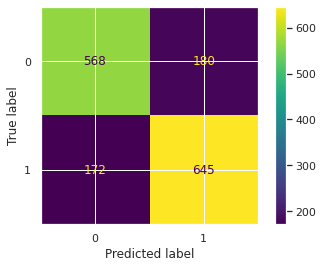

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       748
           1       0.78      0.79      0.79       817

    accuracy                           0.78      1565
   macro avg       0.77      0.77      0.77      1565
weighted avg       0.78      0.78      0.78      1565



In [ ]:
clf = KNeighborsClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy {name} : %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name} %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([KNeighborsClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

KNeighborsClassifier(n_neighbors=9)
Precisión test fold 0: 76.52
Precisión test fold 1: 78.43
Precisión test fold 2: 77.64
Precisión test fold 3: 78.66
Precisión test fold 4: 76.66
Avg. accuracy = 77.58072136539968


#Aplicando SGDClassifier

In [ ]:
>>> from sklearn.linear_model import SGDClassifier
>>> from sklearn.pipeline import make_pipeline

In [ ]:
clfs = [make_pipeline(StandardScaler(),
...                     SGDClassifier(max_iter=1000, tol=1e-3))]
names = ['SGDClassifier']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test SGDClassifier: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

SGDClassifier
Accuracy train SGDClassifier: 77.93%
Accuracy test SGDClassifier: 77.96%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(SGDClassifier(),
 {'loss':('hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
 'penalty':('l2', 'l1', 'elasticnet'),
 'alpha':(0.0001, 0.001, 1)})
grid.fit(x_train,y_train)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "/usr/local/lib/python3.7/

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'elasticnet'}

Accuracy SGDClassifier: 78.75%
Accuracy test SGDClassifier 78.72%


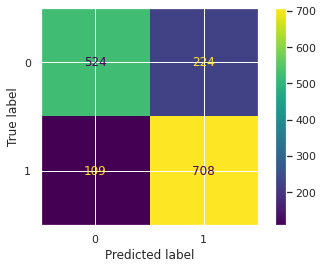

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       748
           1       0.76      0.87      0.81       817

    accuracy                           0.79      1565
   macro avg       0.79      0.78      0.78      1565
weighted avg       0.79      0.79      0.79      1565



In [ ]:
clf = SGDClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy {name}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name} %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([SGDClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

SGDClassifier(alpha=0.001, penalty='elasticnet')
Precisión test fold 0: 77.88
Precisión test fold 1: 78.83
Precisión test fold 2: 79.71
Precisión test fold 3: 77.78
Precisión test fold 4: 78.74
Avg. accuracy = 78.58730268181621


#Aplicando Perceptron

In [ ]:
>>> from sklearn.linear_model import Perceptron

In [ ]:
clfs = [Perceptron()]
names = ['Perceptron']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Perceptron
Accuracy train Perceptron: 63.22%
Accuracy test Perceptron: 63.39%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(Perceptron(),
 {'penalty':('l2','l1','elasticnet'),
 'alpha':(0.0001, 0.001, 0.01, 1, 10),
 'l1_ratio':(0.15, 0.5, 0.75)})
grid.fit(x_train,y_train)
grid.best_params_

{'alpha': 0.001, 'l1_ratio': 0.15, 'penalty': 'l1'}

Accuracy Perceptron: 77.13%
Accuracy test Perceptron 76.74%


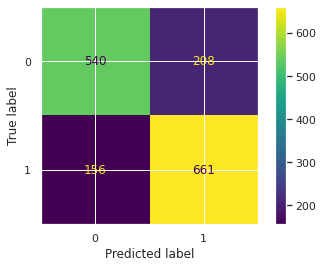

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       748
           1       0.76      0.81      0.78       817

    accuracy                           0.77      1565
   macro avg       0.77      0.77      0.77      1565
weighted avg       0.77      0.77      0.77      1565



In [ ]:
clf = Perceptron(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy {name}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name} %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([Perceptron(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

Perceptron(alpha=0.001, penalty='l1')
Precisión test fold 0: 69.01
Precisión test fold 1: 76.44
Precisión test fold 2: 74.60
Precisión test fold 3: 70.58
Precisión test fold 4: 76.26
Avg. accuracy = 73.37808986038007


#Mejor Modelo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


In [ ]:
X['Cabin'] = X['Cabin'].astype(str)
X['Cabin_side'] = X['Cabin'].apply(lambda x: x[-1:])
X['Cabin'] = X['Cabin'].apply(lambda x: x[:1])
X['Cabin'].unique(), X['Cabin_side'].unique()

(array(['C', 'F', 'B', 'G', 'E', 'D', 'n', 'A', 'T'], dtype=object),
 array(['P', 'S', 'n'], dtype=object))

In [ ]:
X.isna().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin             0
Destination     160
Age               0
VIP             184
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            184
Cabin_side        0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
X = pd.concat((X, pd.get_dummies(X['Cabin'], prefix='Cabin_')), axis=1)
X = pd.concat((X, pd.get_dummies(X['Cabin_side'], prefix='Cabin_side_')), axis=1)
X = X.drop(['Cabin_side', 'Cabin'], axis=1)
X['CryoSleep'] = X['CryoSleep'].replace({True:1, False:0})
X['VIP'] = X['VIP'].replace({True:1, False:0})
#X.dropna(axis=0)

### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [ ]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)
X

Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin__A', 'Cabin__B',
       'Cabin__C', 'Cabin__D', 'Cabin__E', 'Cabin__F', 'Cabin__G', 'Cabin__T',
       'Cabin__n', 'Cabin_side__P', 'Cabin_side__S', 'Cabin_side__n'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__n,Cabin_side__P,Cabin_side__S,Cabin_side__n
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022,...,3.241051,-0.24265,-0.335625,-0.685116,-0.644130,-0.022618,-0.1552,1.028924,-0.981634,-0.1552
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,...,-0.308542,-0.24265,-0.335625,1.459607,-0.644130,-0.022618,-0.1552,-0.971889,1.018710,-0.1552
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,...,-0.308542,-0.24265,-0.335625,-0.685116,-0.644130,-0.022618,-0.1552,-0.971889,1.018710,-0.1552
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616,...,-0.308542,-0.24265,-0.335625,1.459607,-0.644130,-0.022618,-0.1552,1.028924,-0.981634,-0.1552
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676,...,-0.308542,-0.24265,-0.335625,-0.685116,1.552482,-0.022618,-0.1552,1.028924,-0.981634,-0.1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,...,-0.308542,-0.24265,-0.335625,1.459607,-0.644130,-0.022618,-0.1552,-0.971889,1.018710,-0.1552
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316,...,-0.308542,-0.24265,-0.335625,-0.685116,1.552482,-0.022618,-0.1552,-0.971889,1.018710,-0.1552
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,...,-0.308542,-0.24265,-0.335625,1.459607,-0.644130,-0.022618,-0.1552,1.028924,-0.981634,-0.1552
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610,...,-0.308542,-0.24265,2.979518,-0.685116,-0.644130,-0.022618,-0.1552,1.028924,-0.981634,-0.1552


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
np.arange(10, 15)

array([10, 11, 12, 13, 14])

In [ ]:
"""
from sklearn import model_selection
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

clfs = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


trained_models = []
accuracy_models = []
model_name = []

for clf,name in zip(clfs,names):
    #print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    #print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    #print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(float("{:.2f}".format(accuracy*100)))
    model_name.append(name)

model_results = pd.DataFrame([model_name, accuracy_models])
model_results
"""

'\nfrom sklearn import model_selection\nnames = [\n    "Nearest Neighbors",\n    "Linear SVM",\n    "RBF SVM",\n    #"Gaussian Process",\n    "Decision Tree",\n    "Random Forest",\n    "Neural Net",\n    "AdaBoost",\n    "Naive Bayes",\n    "QDA",\n]\n\nclfs = [\n    KNeighborsClassifier(3),\n    SVC(kernel="linear", C=0.025),\n    SVC(gamma=2, C=1),\n    #GaussianProcessClassifier(1.0 * RBF(1.0)),\n    DecisionTreeClassifier(max_depth=5),\n    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\n    MLPClassifier(),\n    AdaBoostClassifier(),\n    GaussianNB(),\n    QuadraticDiscriminantAnalysis(),\n]\n\n\ntrained_models = []\naccuracy_models = []\nmodel_name = []\n\nfor clf,name in zip(clfs,names):\n    #print(name)\n    clf.fit(x_train, y_train)\n    train_predictions = clf.predict(x_train)\n    accuracy = accuracy_score(y_train, train_predictions)\n    #print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))\n\n    train_predictions = clf.predict(x_test)\n  

### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
#80.77
"""
clf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(800, 800, 800, 400, 400),
               learning_rate_init=0.0001, max_iter=500, random_state=2022, activation='relu',
                alpha=0.0001, solver='adam').fit(x_train.values, y_train)
  """

"\nclf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(800, 800, 800, 400, 400),\n               learning_rate_init=0.0001, max_iter=500, random_state=2022, activation='relu',\n                alpha=0.0001, solver='adam').fit(x_train.values, y_train)\n  "

In [ ]:
#81.21
"""
clf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(600, 600, 600, 600, 400, 400),
               learning_rate_init=0.0001, max_iter=500, random_state=2022, activation='relu',
                alpha=0.0001, solver='adam').fit(x_train.values , y_train)
"""

"\nclf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(600, 600, 600, 600, 400, 400),\n               learning_rate_init=0.0001, max_iter=500, random_state=2022, activation='relu',\n                alpha=0.0001, solver='adam').fit(x_train.values , y_train)\n"

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


In [ ]:
#80.77%
"""
clf =LGBMClassifier(colsample_bytree= 0.7076074093370144,
                    min_child_samples= 105,
                    min_child_weight= 1e-05,
                    num_leaves= 26,
                    reg_alpha= 5,
                    reg_lambda= 5,
                    subsample= 0.7468773130235173).fit(x_train.values , y_train)
"""

'\nclf =LGBMClassifier(colsample_bytree= 0.7076074093370144,\n                    min_child_samples= 105,\n                    min_child_weight= 1e-05,\n                    num_leaves= 26,\n                    reg_alpha= 5,\n                    reg_lambda= 5,\n                    subsample= 0.7468773130235173).fit(x_train.values , y_train)\n'

Accuracy train: 83.00%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy test: 81.21%


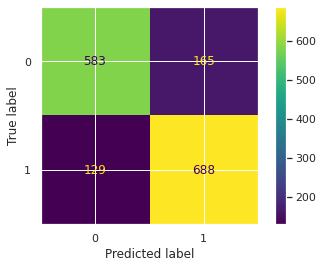

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.82      0.78      0.80       748
           1       0.81      0.84      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565

dict_items([('activation', 'relu'), ('alpha', 0.0001), ('batch_size', 'auto'), ('beta_1', 0.9), ('beta_2', 0.999), ('early_stopping', True), ('epsilon', 1e-08), ('hidden_layer_sizes', (600, 600, 600, 600, 400, 400)), ('learning_rate', 'constant'), ('learning_rate_init', 0.0001), ('max_fun', 15000), ('max_iter', 500), ('momentum', 0.9), ('n_iter_no_change', 10), ('nesterovs_momentum', True), ('power_t', 0.5), ('random_state', 2022), ('shuffle', True), ('solver', 'adam'), ('tol', 0.0001), ('validation_fraction', 0.1), ('verbose', False), ('warm_start', False)])


In [ ]:
clf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(600, 600, 600, 600, 400, 400),
               learning_rate_init=0.0001, max_iter=500, random_state=2022, activation='relu',
                alpha=0.0001, solver='adam').fit(x_train.values , y_train)

train_predictions = clf.predict(x_train.values)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))
print(clf.get_params().items())

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv')
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


In [ ]:
#tratamiento test_df

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_id = PassengerId


test_df['Cabin'] = test_df['Cabin'].astype(str)
test_df['Cabin_side'] = test_df['Cabin'].apply(lambda x: x[-1:])
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: x[:1])
test_df['Cabin'].unique(), test_df['Cabin_side'].unique()

test_df = pd.concat((test_df, pd.get_dummies(test_df['Cabin'], prefix='Cabin_')), axis=1)
test_df = pd.concat((test_df, pd.get_dummies(test_df['Cabin_side'], prefix='Cabin_side_')), axis=1)
test_df = test_df.drop(['Cabin_side', 'Cabin'], axis=1)
test_df['CryoSleep'] = test_df['CryoSleep'].replace({True:1, False:0})
test_df['VIP'] = test_df['VIP'].replace({True:1, False:0})
#test_df.dropna(axis=0)

for var in test_df:
    if test_df[var].dtype == 'object':
        unique_cases = test_df[var].unique()
        if len(unique_cases) > 5:
            print(var)
            test_df.drop(var, inplace=True, axis=1)

passengerId = test_df.PassengerId
test_df.drop('PassengerId',axis=1,inplace=True)

print(test_df.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

x_names = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=x_names)

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(test_df)
test_df

Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin__A', 'Cabin__B',
       'Cabin__C', 'Cabin__D', 'Cabin__E', 'Cabin__F', 'Cabin__G', 'Cabin__T',
       'Cabin__n', 'Cabin_side__P', 'Cabin_side__S', 'Cabin_side__n'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__n,Cabin_side__P,Cabin_side__S,Cabin_side__n
0,0.372375,1.184602,-1.836298,0.389487,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,...,-0.288855,-0.228024,-0.326910,-0.716271,-0.661828,-0.033923,7.549834,-0.935414,-1.032719,7.549834
1,-0.784647,1.184602,-0.642293,-1.050400,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,...,-0.288855,-0.228024,-0.326910,-0.716271,1.510966,-0.033923,-0.132453,-0.935414,0.968318,-0.132453
2,-0.784647,-0.699500,0.551713,1.075147,-0.194446,-0.344213,-0.309830,-0.274152,0.441916,-0.250575,...,-0.288855,-0.228024,-0.326910,-0.716271,1.510966,-0.033923,-0.132453,1.069045,-1.032719,-0.132453
3,-0.784647,-0.699500,-0.642293,2.377902,-0.194446,-0.385490,-0.310498,-0.152063,-0.309805,1.277745,...,-0.288855,-0.228024,3.058945,-0.716271,-0.661828,-0.033923,-0.132453,-0.935414,0.968318,-0.132453
4,0.372375,-0.699500,-1.836298,-1.256098,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,...,-0.288855,-0.228024,-0.326910,-0.716271,-0.661828,-0.033923,-0.132453,-0.935414,0.968318,-0.132453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.529396,-0.699500,0.551713,1.760807,-0.194446,0.882864,-0.310498,0.078379,0.019943,-0.250575,...,-0.288855,-0.228024,-0.326910,1.396121,-0.661828,-0.033923,-0.132453,-0.935414,0.968318,-0.132453
866,-0.784647,1.184602,0.551713,2.035071,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,...,-0.288855,-0.228024,-0.326910,-0.716271,1.510966,-0.033923,-0.132453,-0.935414,0.968318,-0.132453
867,-0.784647,1.184602,-0.642293,-0.707570,-0.194446,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,...,-0.288855,-0.228024,-0.326910,-0.716271,1.510966,-0.033923,-0.132453,1.069045,-1.032719,-0.132453
868,-0.784647,-0.699500,0.551713,-0.707570,-0.194446,1.049852,-0.310498,-0.254312,-0.309805,-0.250575,...,-0.288855,-0.228024,-0.326910,1.396121,-0.661828,-0.033923,-0.132453,-0.935414,0.968318,-0.132453


In [ ]:
test_pred = clf.predict(test_df)
#test_pred = test_pred.astype(bool)
test_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("group8_submission_0727_3.csv", header=True, index=False)